In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualize
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import torch

In [2]:
rawData = pd.read_csv('../input/titanic/train.csv')
rawData.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
rawData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
rawData[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [5]:
for col in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    print(rawData[[col, 'Survived']].groupby([col]).mean().sort_values(by='Survived', ascending=False))
    print('---------------------------------------')
    

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
---------------------------------------
        Survived
Sex             
female  0.742038
male    0.188908
---------------------------------------
       Survived
Age            
0.42        1.0
5.00        1.0
63.00       1.0
53.00       1.0
0.67        1.0
...         ...
28.50       0.0
36.50       0.0
34.50       0.0
20.50       0.0
23.50       0.0

[88 rows x 1 columns]
---------------------------------------
       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000
---------------------------------------
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000
---------------------------------------
          Survived
Fare              
512.3292       1.0
57.9792        1.0
13.8583        1.0
13.7917        1.0
13.4167       

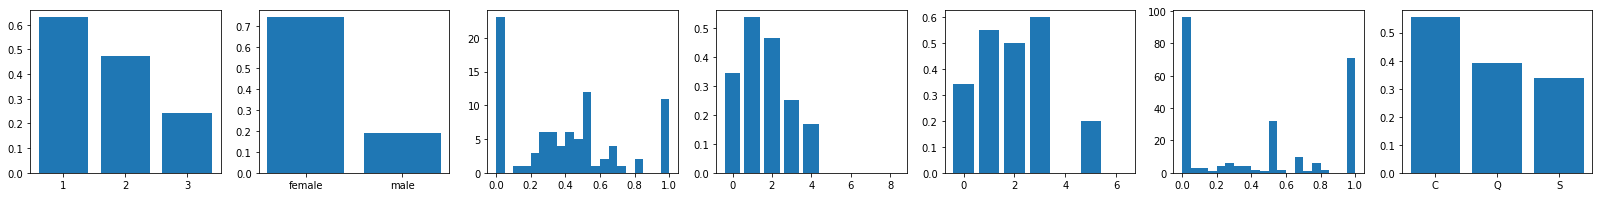

In [6]:
figure, axes = plt.subplots(1, 7, figsize=(28, 3))
i = 0
for col in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    extractedData = rawData[[col, 'Survived']].groupby([col], as_index=False).mean().sort_values(by='Survived', ascending=False)
    if (col != 'Age' and col != 'Fare'):
        axes[i].bar(extractedData[col], extractedData['Survived'])
    else:
        axes[i].hist(extractedData['Survived'], 20)
    i += 1

Survive rate of CabinBool = 1: 66.66666666666666
Survive rate of CabinBool = 0 29.985443959243085


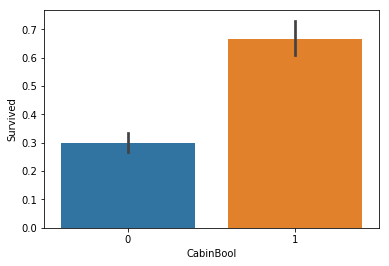

In [7]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Survive rate of CabinBool = 1:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Survive rate of CabinBool = 0", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

### Drop useless columns and nan

In [8]:
train = train.drop('Ticket', axis=1)
test = test.drop('Ticket', axis=1)
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)
train = train.fillna({'Embarked': "S"})

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinBool
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])



Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [12]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


In [13]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,3
2,3,1,3,female,26.0,0,0,7.9250,S,0,2
3,4,1,1,female,35.0,1,0,53.1000,S,1,3
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinBool,Title
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956,1.751964
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397,1.112838
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,6.000000


In [15]:
# fill missing ages to its mean
train = train.fillna({'Age': train['Age'].mean()})
test = test.fillna({'Age': test['Age'].mean()})
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,3
2,3,1,3,female,26.0,0,0,7.9250,S,0,2
3,4,1,1,female,35.0,1,0,53.1000,S,1,3
4,5,0,3,male,35.0,0,0,8.0500,S,0,1


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,CabinBool,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956,1.751964
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397,1.112838
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,6.000000


In [17]:
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0,1
1,2,1,1,1,38.0,1,0,71.2833,C,1,3
2,3,1,3,1,26.0,0,0,7.9250,S,0,2
3,4,1,1,1,35.0,1,0,53.1000,S,1,3
4,5,0,3,0,35.0,0,0,8.0500,S,0,1


In [18]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,0,22.0,1,0,7.2500,1,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,3
2,3,1,3,1,26.0,0,0,7.9250,1,0,2
3,4,1,1,1,35.0,1,0,53.1000,1,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,0,1


In [19]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6]
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,0,22.0,1,0,7.2500,1,0,1,3
1,2,1,1,1,38.0,1,0,71.2833,2,1,3,5
2,3,1,3,1,26.0,0,0,7.9250,1,0,2,4
3,4,1,1,1,35.0,1,0,53.1000,1,1,3,4
4,5,0,3,0,35.0,0,0,8.0500,1,0,1,4


In [20]:
train = train.drop('Age', axis=1)
test = test.drop('Age', axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,0,1,0,7.2500,1,0,1,3
1,2,1,1,1,1,0,71.2833,2,1,3,5
2,3,1,3,1,0,0,7.9250,1,0,2,4
3,4,1,1,1,1,0,53.1000,1,1,3,4
4,5,0,3,0,0,0,8.0500,1,0,1,4


In [21]:
train.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,0.523008,0.381594,32.204208,1.361392,0.228956,1.751964
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.635673,0.420397,1.112838
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,3.000000,1.000000,6.000000


In [22]:
labels = [0, 1, 2, 3]
train['FareGroup'] = pd.qcut(train["Fare"], 4, labels = labels)
test['FareGroup'] = pd.qcut(test["Fare"], 4, labels = labels)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup,FareGroup
0,1,0,3,0,1,0,7.2500,1,0,1,3,0
1,2,1,1,1,1,0,71.2833,2,1,3,5,3
2,3,1,3,1,0,0,7.9250,1,0,2,4,1
3,4,1,1,1,1,0,53.1000,1,1,3,4,3
4,5,0,3,0,0,0,8.0500,1,0,1,4,1


In [23]:
train = train.drop('Fare', axis=1)
test = test.drop('Fare', axis=1)
train_Y_pd = train['Survived']
train_X_pd = train.drop('Survived', axis=1)
test_X_pd = test


# TODO: convert category to int/float

In [24]:
train_X_pd = train_X_pd.astype("float32")
train_Y_pd = train_Y_pd.astype("float32")
test_X_pd = test_X_pd.astype("float32")
print(train_X_pd.dtypes)
train_X_np = train_X_pd.values[:, 1:]
train_Y_np = train_Y_pd.values
test_X_np = test_X_pd.values[:, 1:]
print(train_X_np.dtype)
train_X = torch.from_numpy(train_X_np)
train_Y = torch.from_numpy(train_Y_np)
test_X = torch.from_numpy(test_X_np)

PassengerId    float32
Pclass         float32
Sex            float32
SibSp          float32
Parch          float32
Embarked       float32
CabinBool      float32
Title          float32
AgeGroup       float32
FareGroup      float32
dtype: object
float32


In [25]:
print(train_X.shape)
print(train_Y.shape)

torch.Size([891, 9])
torch.Size([891])


In [26]:
# dimensions
M, D_in, H, D_out = 891, 9, 6, 1 


model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)
for epoch in range(3000):
    Y = model(train_X).reshape(-1)
    #print(Y.shape, train_Y.shape)
    loss = loss_fn(Y, train_Y)
    if (epoch % 200 == 199):
        print(epoch + 1, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#predict
Y = model(test_X).reshape(-1)
Y = (Y > 0.5)

200 0.4470307230949402
400 0.4405308961868286
600 0.4386421740055084
800 0.4374016225337982
1000 0.43642982840538025
1200 0.4355230927467346
1400 0.4348260760307312
1600 0.43429034948349
1800 0.43390631675720215
2000 0.4336111545562744
2200 0.43339627981185913
2400 0.4332244098186493
2600 0.43308600783348083
2800 0.4329792261123657
3000 0.4328910708427429


In [27]:
import csv
Y_np = Y.numpy()
Y_np = Y_np.reshape(-1, 1)
index = np.arange(892, 1310).reshape(-1, 1)
print(index.shape, Y_np.shape)
data = np.hstack((index, Y_np))
data

    

(418, 1) (418, 1)


array([[ 892,    0],
       [ 893,    1],
       [ 894,    0],
       [ 895,    0],
       [ 896,    1],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    1],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    0],
       [ 910,    0],
       [ 911,    1],
       [ 912,    0],
       [ 913,    1],
       [ 914,    1],
       [ 915,    0],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    1],
       [ 925,    1],
       [ 926,    0],
       [ 927,    0],
       [ 928,    1],
       [ 929,    1],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [28]:
with open('../working/submission.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["PassengerId", "Survived"])
    writer.writerows(data)